<div style="border:solid Chocolate 2px; padding: 40px">
<b>Привет, Дмитрий!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду тимлилом твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом!
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии раскрашены разными цветами: 
<br/>
<div class="alert alert-success">
Решение полностью правильное, или я посчитала нужным тебя за что-то похвалить :) На такие решения можно опираться в будущих проектах.
</div>

<div class="alert alert-warning">
Решение станет еще лучше, если внести небольшие коррективы. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (но это не обязательно).
</div>
<div class="alert alert-block alert-danger">
Решение требует существенной переработки. Напомню, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
<br/>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. **Также обрати внимание, что все три части работы (план, код, отчет) должны идти подряд в одном блокноте. Приступая к следующей части, пожалуйста, не удаляй и не изменяй предыдущие.** Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀

Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Проект "Кто следущий?"

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<div class="alert alert-success">
<h3> Комментарий тимлида (план) <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Очень хорошо, что оставляешь в начале проекта его описание! Любой, кто захочет взглянуть на работу, сможет сразу погрузиться в суть задачи :)

### Цель проекта

Создать модель, позволяющую на основе данных, предоставленных провайдером выявлять клиентов, которые потенциально могут расторгнуть договор обслуживания.

In [1]:
#pip install skimpy -q

In [2]:
%%capture
#install phik (if not installed yet)
import sys

!"{sys.executable}" -m pip install phik

<div class="alert alert-warning">
<h3> Комментарий тимлида (план)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Чтобы при установке не вылезала эта информация, в конце строки можно добавлять `-q`

In [3]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta,date
from timeit import default_timer as timer
from scipy import stats as st
from skimpy import clean_columns

import phik

from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
sns.set()

RANDOM = 190623

## Загрузка и обзор данных

In [4]:
#старт времени выполнения
start_note_time = timer()

Данные будут загружены в следующие датафреймы:<br>

**dc** - contract_new.csv — информация о договоре;<br>
**dp** - personal_new.csv — персональные данные клиента;<br>
**di** - internet_new.csv — информация об интернет-услугах;<br>
**dph** - phone_new.csv — информация об услугах телефонии.

In [5]:
try:    
    dc = pd.read_csv('/datasets/contract_new.csv')
    dp = pd.read_csv('/datasets/personal_new.csv')
    di =  pd.read_csv('/datasets/internet_new.csv')
    dph =  pd.read_csv('/datasets/phone_new.csv')
except:
    dc = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    dp = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    di =  pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    dph =  pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

#### Сбор информации о датафреймах

In [6]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [7]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [8]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [9]:
dph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [10]:
dc.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [11]:
dp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [12]:
di.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [13]:
dph.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


#### Проверка на дубликаты

Во всех полях, кроме **customerID** сведения могут совпадать, поэтому проверке на дубликаты подвергается только **customerID**

In [14]:
dc.duplicated(['customerID']).sum()

0

In [15]:
dp.duplicated(['customerID']).sum()

0

In [16]:
di.duplicated(['customerID']).sum()

0

In [17]:
dph.duplicated(['customerID']).sum()

0

Проверка поля TotalCharges

In [18]:
dc[dc['TotalCharges'].str.contains(" ")]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Сведения отсутствуют в связи с отсуствием оплаты по договору, который был заключен в день предоставления данных заказчиком (01 февраля 2020 года).<br>

<del>Эти данные можно удалить в связи с их ничтожным влиянием на общую картину</del>

<div class="alert alert-info">
<b>Доработка:</b>
<br>
Отсутствующие данные в <b>MonthlyCharges</b> заполним помесячной оплатой
</div>

<div class="alert alert-warning">
<h3> Комментарий тимлида (план) <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Удаление - тоже приемлемый вариант, но я больше все-таки склоняюсь к заполнению ежемесячной оплатой. Почему не совсем поддерживаю удаление: на практике вероятнее всего через нашу модель регулярно будут пропускаться абсолютно все действующие клиенты, если мы удалим из выборки всех новых клиентов и при этом выберем модели на основе деревьев, может случиться так, что из-за плохой масштабируемости деревьев наша модель на новых клиентах будет работать не совсем так, как мы того ожидаем.

<div class="alert alert-info">
<b>Доработка:</b>
<br>

Аномальные значения в столбцах

In [19]:
for n in dc.columns:
    print(dc[n].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-01' '2018-02-01'
 '2016-06-01' '2015-08-01' '2015-11-01' '2014-06-01' '201

In [20]:
for n in dp.columns:
    print(dp[n].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']


In [21]:
for n in di.columns:
    print(di[n].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['DSL' 'Fiber optic']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [22]:
for n in dph.columns:
    print(dph[n].unique())

['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
['No' 'Yes']


 Нетипичных категорий в категориальных признаках не выявлено

Аномальные значения в числовх данных будут рассмотрены позже после предобработки

### Вывод (обзор данных)

Исходные датафреймы пропусков и дубликатов не имеют.<br>
Аномальных и нетипичных значений не выявлено<br>
Таблицы dc и dp имеют одинаковое количество записей, поэтому, возможно, в них содержатся сведения об одних и тех же абонентах. Точнее можно будет сказать при объединении таблиц.<br>
В таблице dc поле **BeginDate** требуется привести к типу **data**. **TotalCharges** необходимо привести к **float**, предварительно удалив строки, содержащие пробелы (договор только что заключен и не оплачен)<br>
По всей видимости, данные экспортировались неправильно из какой-либо базы данных.<br>
Наименования столбцов необходимо привести к нижнему регистру с нижним подчеркиванием.<br>


В качестве целевого признака необходимо будет создать отдельный бинарный столбец на основе **EndDate**, в котором 1 - наличие договора о расторжении, 0 - в противном случае.<br>
Необходимо создать поле c количеством дней, прошедших с момента заключения договора, до даты 1 февраля 2020. На его основе, в частности можно будет проверить аномальные сроки действия договоров<br>

Для дальнейшего анализа данных и последущего моделирования необходимо будет исходные датафреймы объединять по **customerID**<br>

После слияния и заполнения пропусков бинарные значения Yes и No заменить на 0, 1

<div class="alert alert-warning">
<h3> Комментарий тимлида (план)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> При первичном анализе также важно проверить наличие каких-то ошибок: явно выбывающихся значений в числовых признаках и нетипичных категорий в категориальных.

### План работы

1. Предобработка данных и конструирование новых признаков <br>

Выполнить обработку имен столбцов, работа с типами данных, удаление дубликатов, создание новых столбцов, слияние таблиц (merge), заполнение образовавшихся пропусков

2. Исследовательский анализ данных (EDA)<br>

Выявление закономерностей функционирования системы данных, которые, возможно, позволят выявить существенные признаки, потенциально оказывающих влияние на построение модели (построение "портрета" клиента, баланс классов, развитие структуры в динамике, построение визуализаций)

3. Исследование мультиколлинеарности<br>

Выявление зависимости между признаками, коллинеарность признаков с целевым признаком<br>
На основе этого отбираем признаки для модели (future selection), можно дополнитель но применить F-test



4. Разделение данных на выборки<br>

Так как будет использоваться GridSearch, то данные будут разбиты на **тренировочную** и **тестовую** выборки в отношении 3:1<br>
Кодирование признаков (OHE)<br>
Масштабирование признаков



5. Обучение моделей с подбором параметров 

LogisticRegression<br>
RandomForestClassifier<br>

для подбора параметра использовать GridSearchCV



6. Выбор лучшей модели по кросс-валидационной выборке

В качестве метрики используется ROC-AUC

7. Тестирование модели<br>

Выполнить тестирование модели на тестовой выборке<br>
проверить на адекватность (можно по ROC - кривой)



8. Выявление важности признаков (future importance)

Для дальнейшего отслеживания жизненного цикла модели<br>
Для внесения изменения в существующую модель в части исключения маловажных признаков из модели

9. Оценка точности модели, построение матрицы ошибок

10. Создание отчета

<div class="alert alert-success">
<h3> Комментарий тимлида (план) <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Потрясающий план, со всеми деталями!

### Вопросы к заказчику:

1. Имеется ли сведения о времени выхода абонента в сеть(если это интернет), длительности пребывания, средней скорости на канале 
(Возможно покинувший недоволен скоростью, а пользуется в часы пиковой нагрузки)<br>
2. Какие скидки, улучшения и прочее провайдер в принципе может предложить клиентам (в зависимости от этого может изменяться анализ данных и сами предоставляемые данные)<br>
3. Кто будет читать отчет и насколько детализировать полученные результаты, кто будет принимать управленческие решения (от этого могут зависеть представляемые выводы, визуализация, представление данных)<br>

<div class="alert alert-success">
<b>Комментарий тимлида:</b>
    
1. Заказчик пока не готов предоставлять дополнительные данные, но идеи действительно интересные.
    
2. Кампания по удержанию клиентов будет формироваться скорее уже на основе способностей нашей модели, а не наоборот. После создания прототипа модели, если он удовлетворит заказчика, начнется этап проработки и тестирования разных стратегий.
    
3. Отчет будет рассматриваться маркетинговым отделом компании и руководством. 

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по плану**

Дмитрий, предварительный анализ проведен хорошо, можно скорректировать лишь некоторые моменты. План составлен релевантно, поэтому можем приступать к реализации последующих шагов.

**Успехов!** 😉

## Предобработка данных

### Преобразование имен столбцов

Использование модуля **skimpy**

In [23]:
dc = clean_columns(dc)

8 column names have been cleaned

In [24]:
dp = clean_columns(dp)

4 column names have been cleaned

In [25]:
di = clean_columns(di)

8 column names have been cleaned

In [26]:
dph = clean_columns(dph)

2 column names have been cleaned

In [27]:
dc.columns.tolist()

['customer_id',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges']

In [28]:
dp.columns.tolist()

['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

In [29]:
di.columns.tolist()

['customer_id',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

In [30]:
dph.columns.tolist()

['customer_id', 'multiple_lines']

### Создание новых данных

Создание целевого столбца

In [31]:
dc['target'] = 0

Если в поле **end_date** находится значение, отличное от **No**, то в поле *target* устанавливается **1**

In [32]:
dc.loc[dc['end_date']!='No','target'] = 1

<div class="alert alert-success">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>

<b>Отличная работа!👍:</b> Отлично, таргет сформирован корректно: целевым действием у нас является уход клиента, поэтому именно его лучше обозначить за positive class, так как от этого зависит интерпретация тех или иных метрик (наиболее используемые метрики, такие как precision, recall, f1, roc-auc, например, фокуcируются на positive оценке, ввиду того, что нам важнее распознать уходящих клиентов, чем оставшихся, то логичнее за positive class обозначить уходящих клиентов). Подробнее <a href = 'https://medium.com/@asimango/the-positive-class-what-should-it-be-in-a-machine-learning-binary-classification-problem-36c316da1127'>тут</a>.

Преобразование типов

In [33]:
dc['begin_date'] = pd.to_datetime(dc['begin_date'])

In [34]:
dc['begin_date'].dtype

dtype('<M8[ns]')

In [35]:
dc.shape[0]

7043

Заполнение пропусков в total_charges

In [36]:
#dc = dc.loc[~dc['total_charges'].str.contains(" ")]

In [37]:
dc.loc[dc['total_charges'].str.contains(" "),'total_charges'] = dc['monthly_charges']

In [38]:
dc.shape[0]

7043

In [39]:
dc['total_charges'] = dc['total_charges'].astype(float)

In [40]:
dc['total_charges'].dtype

dtype('float64')

**Расчет дней действия договора (contract_lifetime)**

In [41]:
def calc_days_between_date(row):
    '''
    Модуль для вычисления количества дней между двумя датами
    '''
    
    someday = date(2020,2,1)
    if row['end_date'] == 'No':
        return (someday - row['begin_date'].date()).days
    else:
        return (datetime.strptime(row['end_date'], '%Y-%m-%d').date() - row['begin_date'].date()).days


In [42]:
dc['contract_lifetime'] = dc.apply(calc_days_between_date, axis=1)

<div class="alert alert-success">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>

<b>Отличная работа!👍:</b> Отлично! Клиентский стаж действительно может оказаться признаком с достаточно хорошей объясняющей способностью.

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Apply работает циклично, перебирая строку за строкой. Разработчики же numpy и pandas при создании каких-то функций постарались сделать так, чтобы производимые внутри них расчеты были эффективнее цикличного перебора. В данном случае было бы лучше сначала произвести замену даты, а затем через векторные вычисления найти уже разницу дат.

<div class="alert alert-info">
<b>Комментарий:</b>
    Пока столбец end_date оставлю без изменений. Возможно, после анализа проведу преобразования. No заменю на 2020-02-01 и выполню расчет времени жизни действия договора по рекомендованному тобой способу
<br>

In [43]:
dc.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_lifetime
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,153
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,0,337
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0,671
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,0,306
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,0,945
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,1,882


Числовые значения присутствуют только в dc, поэтому описание данных извлекается из нее

In [44]:
dc.describe()

,monthly_charges,total_charges,target,contract_lifetime
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.377573,0.156325,898.555729
std,30.090047,2112.678861,0.363189,683.130510
min,18.250000,19.050000,0.000000,0.000000
25%,35.500000,436.750000,0.000000,276.000000
50%,70.350000,1343.350000,0.000000,761.000000
75%,89.850000,3236.690000,0.000000,1461.000000
max,118.750000,9221.380000,1.000000,2314.000000


Аномальных значений в числовых данных не наблюдается

### Замена тестовых бинарных признаков на 0 и 1

In [45]:
for dfr in [dc,dp,di,dph]:
    for i in dfr.columns:
        if len(dfr[i].unique()) == 2:
            dfr.loc[dfr[i] == 'Yes', i] = 1
            dfr.loc[dfr[i] == 'No', i] = 0

### Слияние таблиц

In [46]:
df = pd.merge(dc,dp,how='outer')

In [47]:
df = pd.merge(df,di,how='outer')

In [48]:
df = pd.merge(df,dph,how='outer')

In [49]:
df.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_lifetime,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,31.04,0,31,Female,0,1,0,DSL,0,1,0,0,0,0,NaN
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,2071.84,0,1036,Male,0,0,0,DSL,1,0,1,0,0,0,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,1,Mailed check,53.85,226.17,0,123,Male,0,0,0,DSL,1,1,0,0,0,0,0
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,0,0,DSL,1,0,1,1,0,0,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,1,Electronic check,70.70,353.50,0,153,Female,0,0,0,Fiber optic,0,0,0,0,0,0,0
5,9305-CDSKC,2019-03-01,No,Month-to-month,1,Electronic check,99.65,1150.96,0,337,Female,0,0,0,Fiber optic,0,0,1,0,1,1,1
6,1452-KIOVK,2018-04-01,No,Month-to-month,1,Credit card (automatic),89.10,2058.21,0,671,Male,0,0,1,Fiber optic,0,1,0,0,1,0,1
7,6713-OKOMC,2019-04-01,No,Month-to-month,0,Mailed check,29.75,300.48,0,306,Female,0,0,0,DSL,1,0,0,0,0,0,NaN
8,7892-POOKP,2017-07-01,No,Month-to-month,1,Electronic check,104.80,3573.68,0,945,Female,0,1,0,Fiber optic,0,0,1,1,1,1,1
9,6388-TABGU,2014-12-01,2017-05-01,One year,0,Bank transfer (automatic),56.15,1628.35,1,882,Male,0,0,1,DSL,1,1,0,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   target             7043 non-null   int64         
 9   contract_lifetime  7043 non-null   int64         
 10  gender             7043 non-null   object        
 11  senior_citizen     7043 non-null   int64         
 12  partner            7043 non-null   object        
 13  dependents         7043 non-null   object        
 14  internet

### Заполнение пропусков

Пропуски появилиясь в признаках тех строк, которые относятся к абонентам, не пользующимся интернетом.<br>
**internet_service** заполним **-1**, так как канал связи неизвестен<br>
Поля, относящиеся к интернет сервисам = **No**, так как ими не пользуются те, кто не пользуется интернетом<br>
**multiple_line** заполним **-1** 

In [51]:
df['internet_service'] = df['internet_service'].fillna('U')

In [52]:
df['online_security'] = df['online_security'].fillna(0)

In [53]:
df['online_backup'] = df['online_backup'].fillna(0)

In [54]:
df['device_protection'] = df['device_protection'].fillna(0)

In [55]:
df['tech_support'] = df['tech_support'].fillna(0)

In [56]:
df['streaming_tv'] = df['streaming_tv'].fillna(0)

In [57]:
df['streaming_movies'] = df['streaming_movies'].fillna(0)

In [58]:
df['multiple_lines'] = df['multiple_lines'].fillna('U')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   target             7043 non-null   int64         
 9   contract_lifetime  7043 non-null   int64         
 10  gender             7043 non-null   object        
 11  senior_citizen     7043 non-null   int64         
 12  partner            7043 non-null   object        
 13  dependents         7043 non-null   object        
 14  internet

Пропуски отсутствуют

In [60]:
df.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'target',
       'contract_lifetime', 'gender', 'senior_citizen', 'partner',
       'dependents', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines'],
      dtype='object')

Список столбцов с категориальными признаками

In [61]:
categ_columns = ['type', 'paperless_billing',
       'payment_method', 'gender', 'senior_citizen', 'partner',
       'dependents', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines']

In [62]:
numeric_columns = ['monthly_charges', 'total_charges', 'contract_lifetime']

Создание списка с названиями полей, имеющих числовые категориальные значения (0,1)

In [63]:
columns_0_1 = []
for i in df.columns:
    #print(i, df[i].unique())
    if {0,1} == set(df[i].unique()):
        #print(i, df[i].unique())
        columns_0_1.append(i)

In [64]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_lifetime,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,31.04,0,31,Female,0,1,0,DSL,0,1,0,0,0,0,U
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,2071.84,0,1036,Male,0,0,0,DSL,1,0,1,0,0,0,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,1,Mailed check,53.85,226.17,0,123,Male,0,0,0,DSL,1,1,0,0,0,0,0
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,0,0,DSL,1,0,1,1,0,0,U
4,9237-HQITU,2019-09-01,No,Month-to-month,1,Electronic check,70.70,353.50,0,153,Female,0,0,0,Fiber optic,0,0,0,0,0,0,0


In [65]:
print(columns_0_1)

['paperless_billing', 'target', 'senior_citizen', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']


#### Преобразование типа object в int

In [66]:
for i in columns_0_1:
    df[i] = df[i].astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   int32         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   target             7043 non-null   int32         
 9   contract_lifetime  7043 non-null   int64         
 10  gender             7043 non-null   object        
 11  senior_citizen     7043 non-null   int32         
 12  partner            7043 non-null   int32         
 13  dependents         7043 non-null   int32         
 14  internet

### Вывод:

В ходе предобработки данных: 
- преобразованы имена столбцов в стиль **snake_case**
- создан целевой признак **target**
- создан признак **contract_lifetime**
- текстовые бинарные признаки (Yes, No) преобразованы в числовые (0,1)
- выполнено слияние таблиц
- заполнены образовавшиеся пропуски 

Потерь среди данных нет

## Исследовательский анализ данных

### Построение портрета пользователя, покинувшего провайдера
    

Необходимо построить гистограммы распределений категориальных признаков и такое же распределение для покинувших компанию

Функция **feature_distribution** для построения графика распределения категориального признака:

In [68]:
def feature_distribution(df, column,cond):
    '''
    Модуль построения гистограммы распределения категориального признака
    и распределения этого признака среди покинувших провайдера
    '''
    
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
    plt.xticks(rotation=0)
    sns.countplot(ax=ax[0],x=column, data=df, palette='deep')
    ax[0].set_title('Распределение по ' + column)    
    for i in ax[0].containers:
        ax[0].bar_label(i, labels = [f'{x.get_height()/sum(i.datavalues):.0%}' for x in i])
        
  
    plt.ylabel('Количество');
   
    plt.xticks(rotation=0)
    sns.countplot(ax=ax[1],x=column, data=df[df['target']==1], palette='colorblind',hue='target')
    ax[1].set_title('Распределение по ' + column + ' среди ушедших')
    for i in ax[1].containers:
        ax[1].bar_label(i, labels = [f'{x.get_height()/sum(i.datavalues):.0%}' for x in i])
    plt.ylabel('Количество');
   

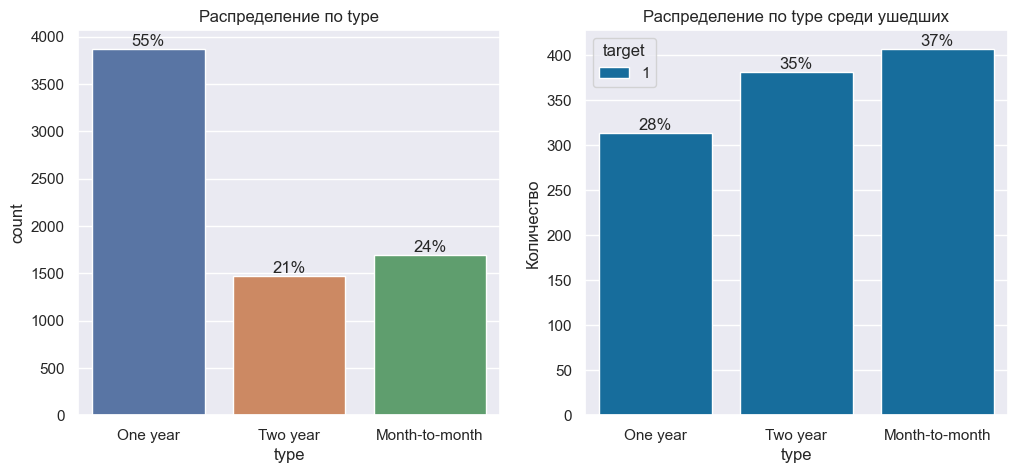

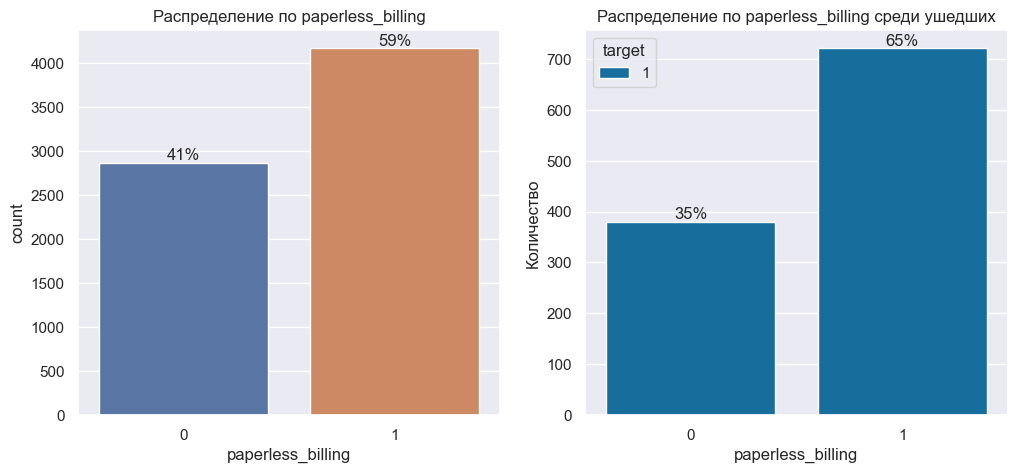

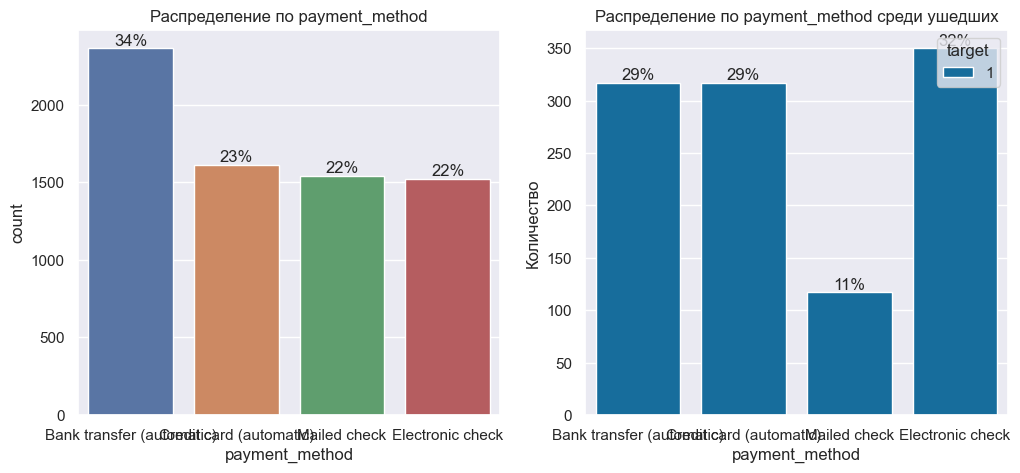

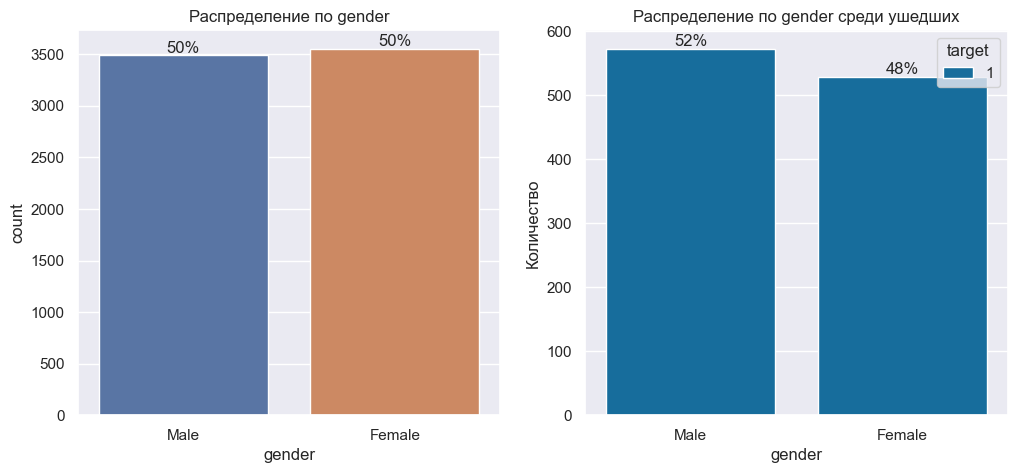

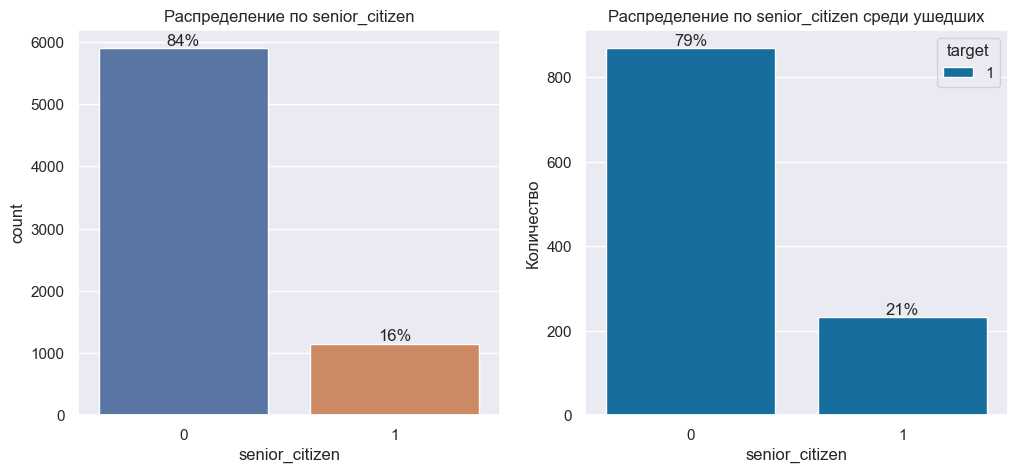

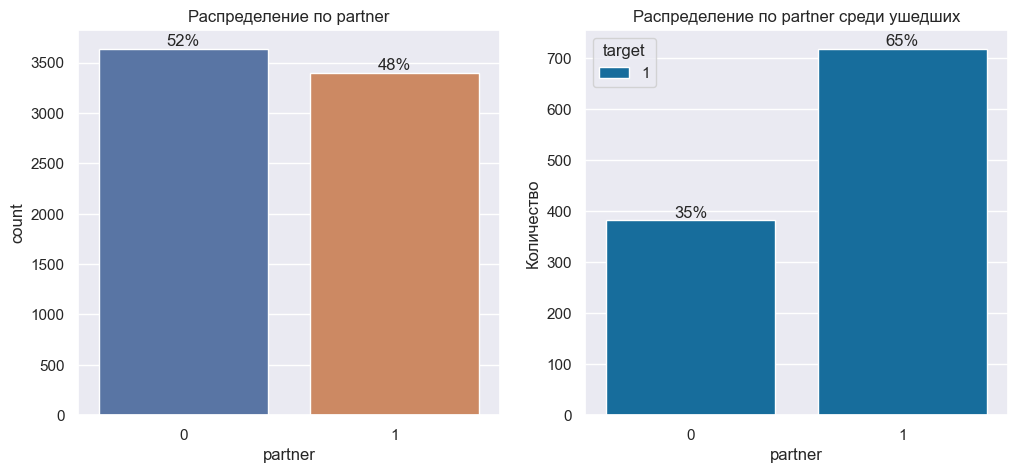

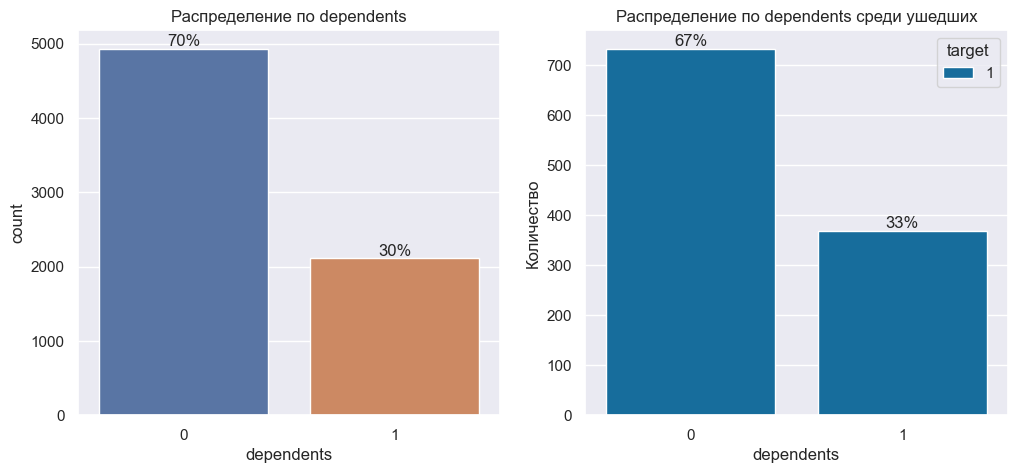

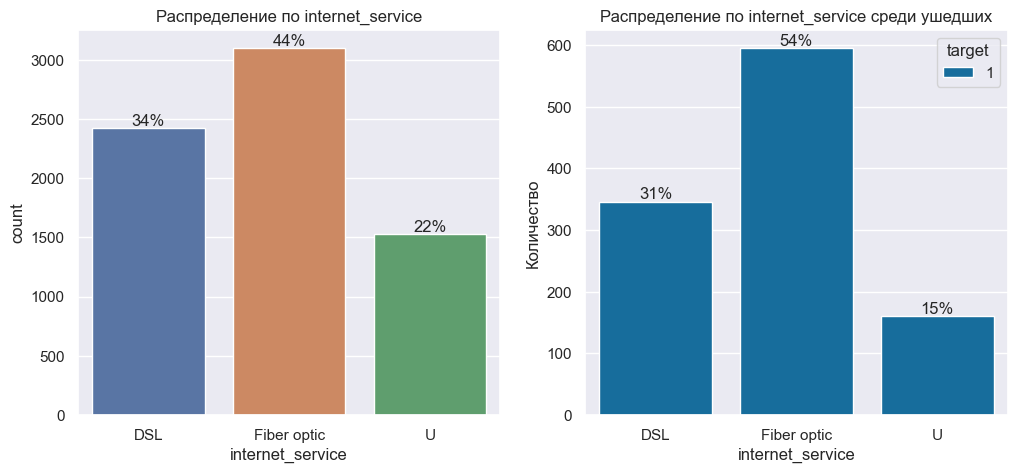

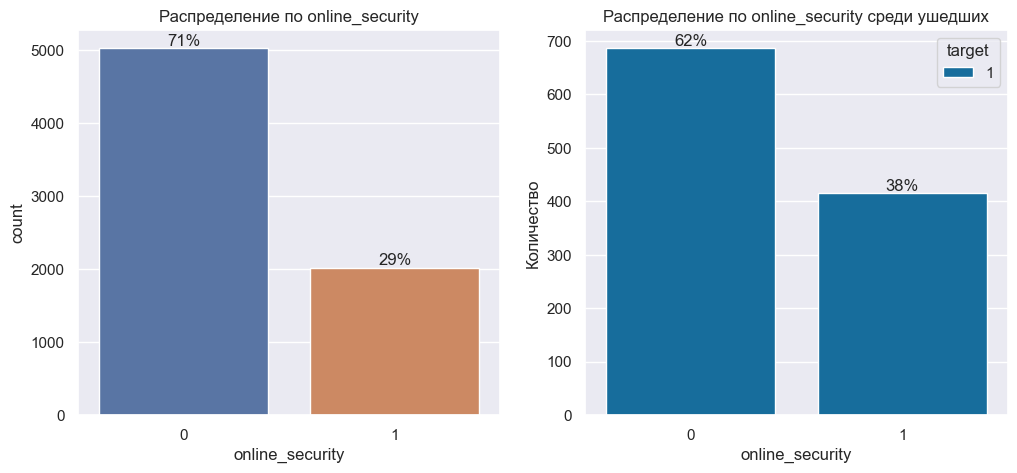

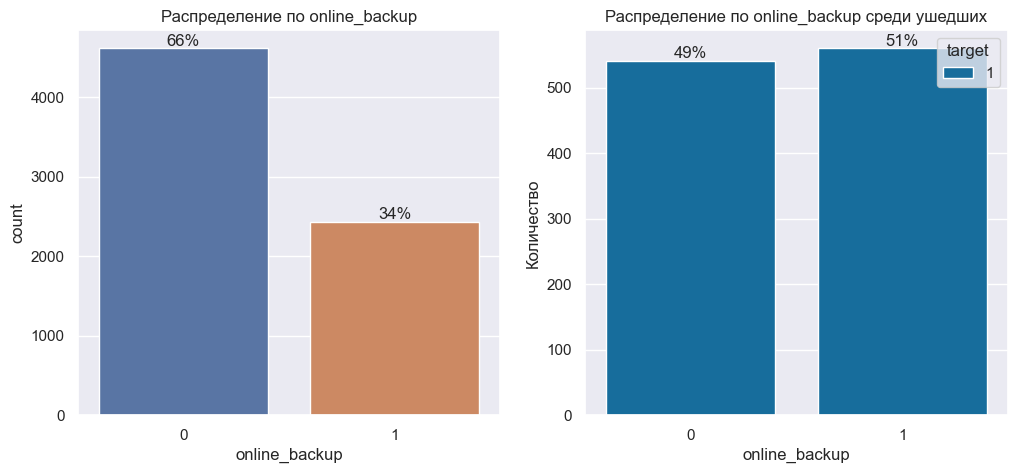

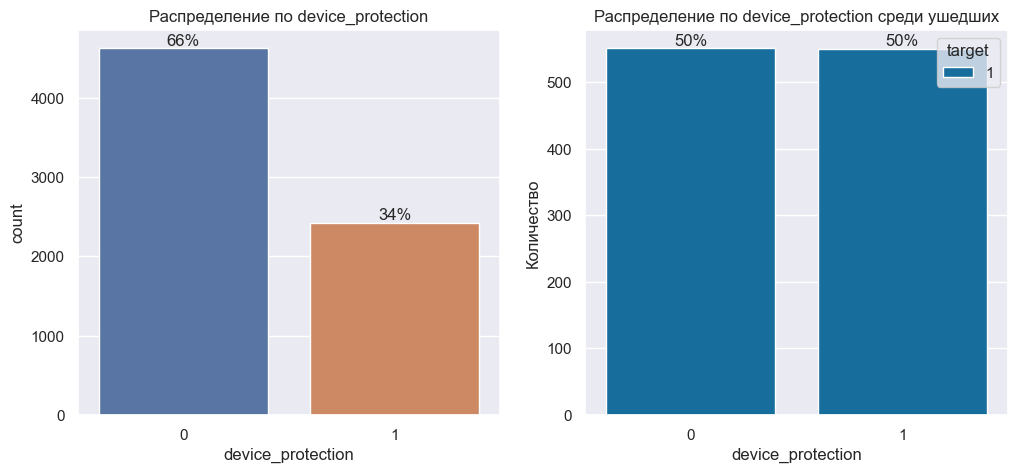

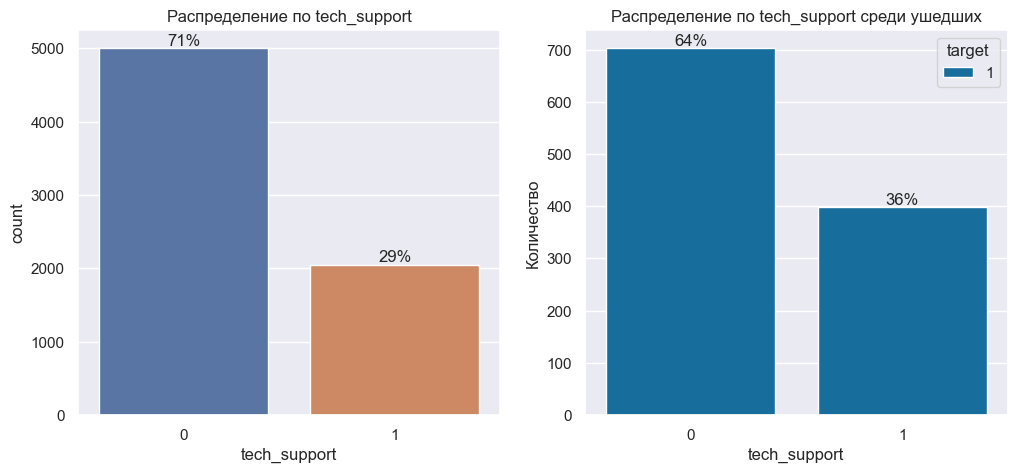

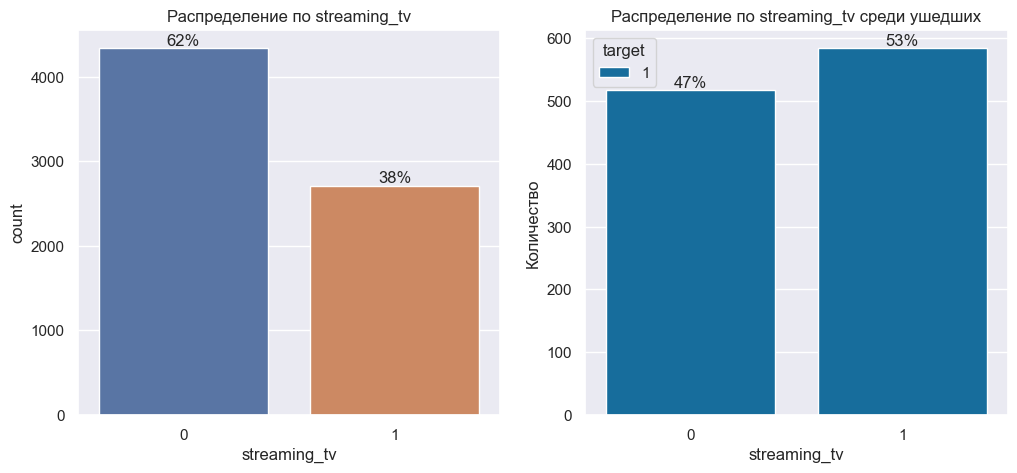

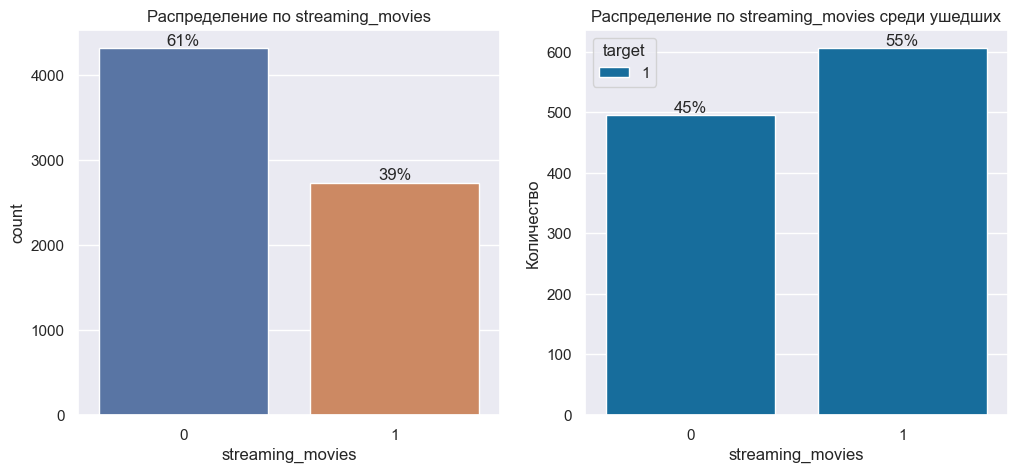

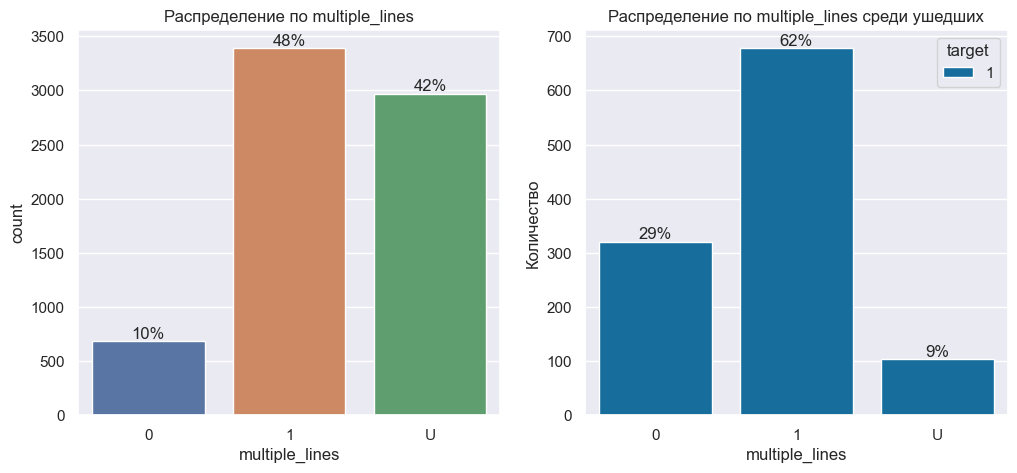

In [69]:
for c in categ_columns:
    feature_distribution(df, c,1)

Среднее время жизни контракта

In [70]:
round(df['contract_lifetime'].mean()/365,2)

2.46

Среднее время жизни контракта для ушедшего абонента

In [71]:
round(df[df['target']==1]['contract_lifetime'].mean()/365,2)

2.53

#### Корреляция числовых признаков между собой

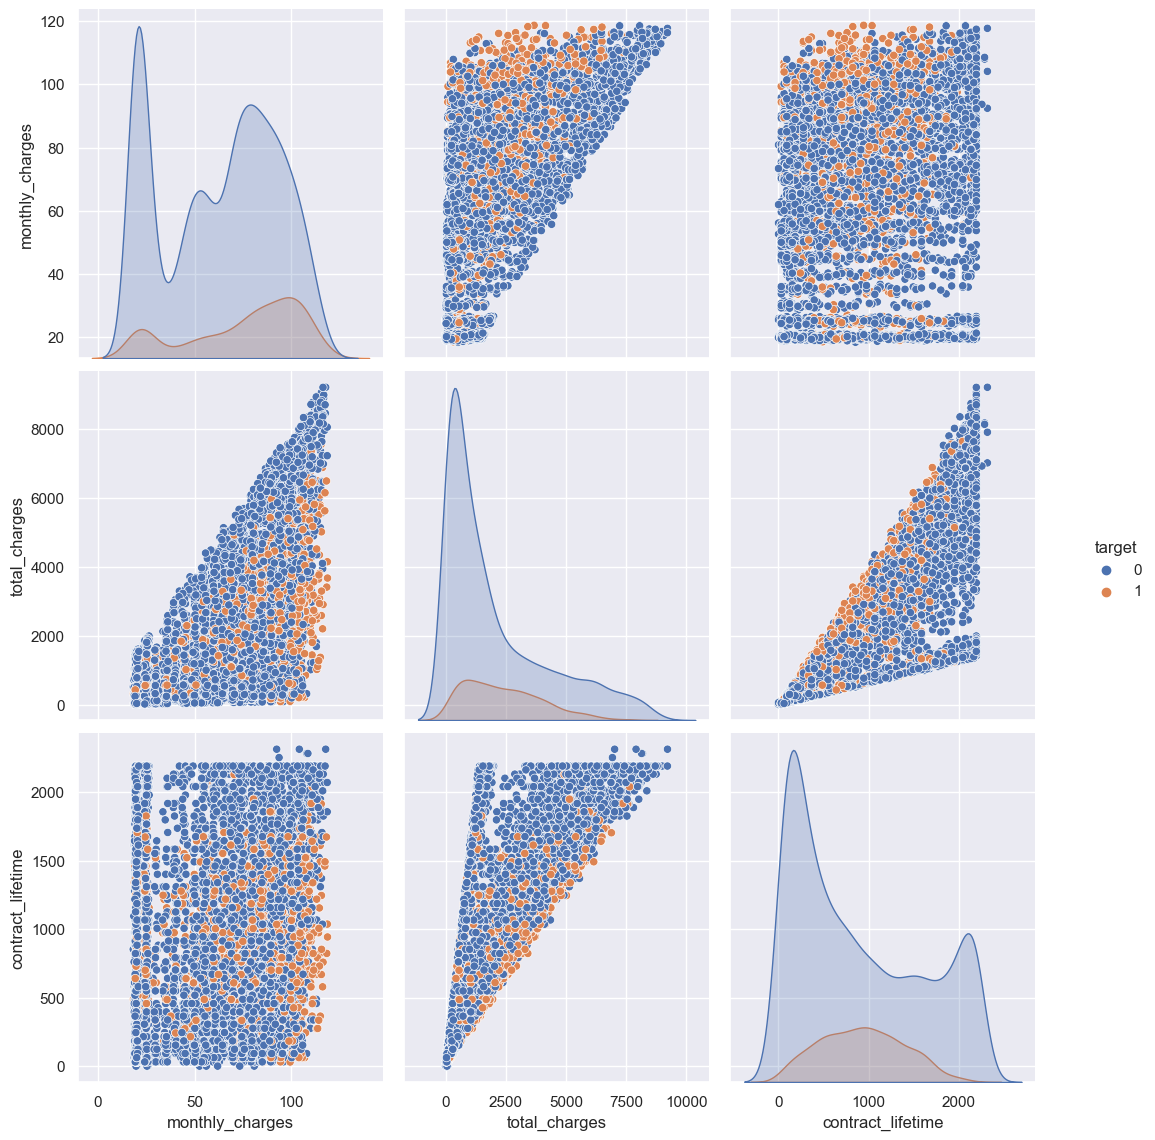

In [72]:
sns.pairplot(df[['monthly_charges','total_charges','contract_lifetime','target']], hue='target').fig.set_size_inches(12,12)

Чаще уходят те, кто в течение 2 - 3 лет получал высокие помесячные счета.<br>
График срока жизни договора имеет практически равномерное распределение. 

#### Анализ графиков

1. Больше абонентов с помесячной оплатой. Ушедшие абоненты равномерно распределены по типу оплаты
2. Большей части абонентов счет выставляется на электронную почту. Среди ушедших также преобладают те, кто получает счет на электр почту, но соотношение практически такое же
3. Способы платежа представлены примерно одинаково, с небольшим отрывом идет Bank transfer (~10%). **Меньше** всего покинули провайдера абоненты, имеющие оплату способом Mailed check, остальные одинаково распределены
4. Распределение по полу среди абонентов одинаковое. Среди ушедших распределение такое же
5. В подавляющем большинстве абоненты не являются пенсионерами. Среди ушедших такая же картина.
6. По семейному статусу абоненты распределены примерно одинаково. Но среди ушедших преобладают те, кто состоит в браке
7. Абонентов, не имеющих детей (иждевенцев), гораздо больше. Они же чаще завершают работу с провайдером
8. Количество абонентов, подключенных по DSL и Fiber optic отличается примерно на 10%. А вот среди ушедших Fiber optic пользовалось на 23% больше.
9. Среди интернет сервисов вопросы вызывают online_backup, servive_protection, streaming_tv, streaming_moves, так как пользующимися этими сервисами абонентов меньше или поровну, а процент ушедших преобладает. Видимо, качество услуг не соответствует ожиданиям.
10. На использование одно- и многоканальных линий заключено договоров примерно одинаково, а вот среди ушедших "многоканальные" договора сильно отрываются вперед (33%)

Исходя из вышеперечисленного, можно составить следующую картину:<br>
Ушедший абонент не является пенсионером, состоит в браке и не имеет иждевенцев, значит - это молодой человек.
То есть, это молодой человек, состоящий в браке и не имееющий иждевенцев, заключивший договор примерно 2,5 года назад на использование канала Fiber optic, многоканальной линии, с получением счетов на электронную почту, выполняющий платежи любым способом, отличным от mailed check, и недовольный работой online_backup, servive_protection, streaming_tv, streaming_moves сервисов.

Создается впечатление, что у провайдера проблемы с предоставлением качественных услуг

### Динамика заключенных и расторгнутых договоров по годам

In [73]:
df_year = df.copy()

In [74]:
df_year['y'] = pd.DatetimeIndex(df_year['begin_date']).year

In [75]:
ddd = pd.DataFrame(df_year['y'].value_counts()).reset_index()

In [76]:
df1_year = df.query('target == 1')

In [77]:
df1_year['end_date'] = pd.to_datetime(df1_year['end_date'])

In [78]:
df1_year['y'] = pd.DatetimeIndex(df1_year['end_date']).year

In [79]:
ddd1 = pd.DataFrame(df1_year['y'].value_counts()).reset_index()

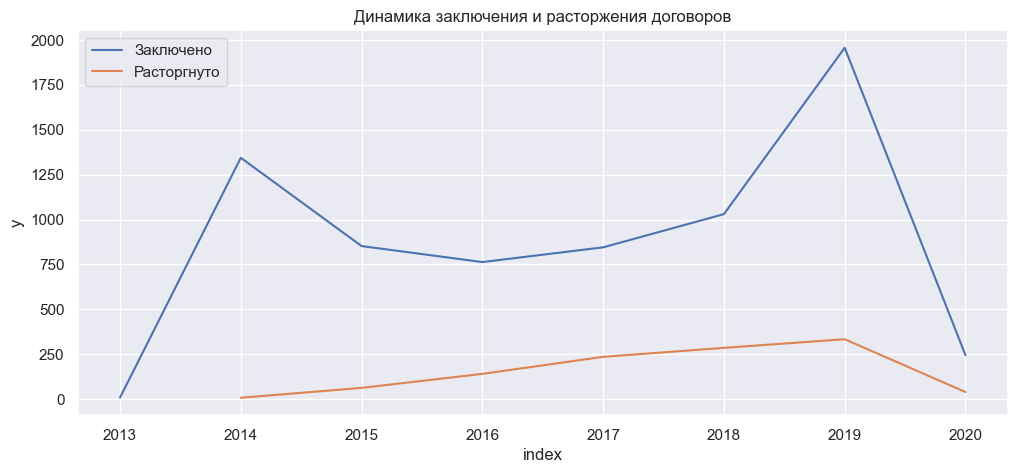

In [80]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(y="y",x='index',data=ddd,label='Заключено');
sns.lineplot(y="y",x='index',data=ddd1,label='Расторгнуто');
ax.set_title('Динамика заключения и расторжения договоров')
ax.legend();

получение сзначения месяца из даты заключения договора

In [81]:
df_year['m'] = pd.DatetimeIndex(df_year['begin_date']).month

In [82]:
d_is = df_year.pivot_table(index='y',values='begin_date',columns='m',aggfunc=['count'])

Распределение подключения к проввайдеру по месяцам

In [83]:
d_is.head(10)

count                                                                 \
m        1      2      3      4      5      6      7      8      9      10   
y                                                                            
2013    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    3.0   
2014    7.0  366.0  178.0  114.0   98.0   97.0   98.0   82.0   72.0   80.0   
2015   75.0   80.0   58.0   69.0   74.0   79.0   61.0   66.0   67.0   81.0   
2016   57.0   73.0   61.0   73.0   68.0   59.0   58.0   67.0   74.0   65.0   
2017   64.0   55.0   94.0   66.0   66.0   62.0   65.0   71.0   73.0   57.0   
2018   73.0   91.0   89.0   81.0   65.0   84.0   80.0  100.0  100.0   78.0   
2019  114.0  128.0  110.0  108.0  123.0  141.0  156.0  146.0  237.0  237.0   
2020  233.0   11.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                    
m        11     12  
y                   
2013    2.0    3.0  
2014   77.0   75.0  
2015   74.0   68.0  
2016   50.0   58.0  
2017   82.0   90.0  
2018   99.0   90.0  
2019  237.0  220.0  
2020    NaN    NaN

In [84]:
for i in categ_columns:
    d_is = df_year.pivot_table(index='y',values='begin_date',columns=i,aggfunc=['count'])
    print(d_is)

              count                  
type Month-to-month One year Two year
y                                    
2013            NaN      1.0      7.0
2014          102.0    292.0    950.0
2015          232.0    327.0    293.0
2016          316.0    267.0    180.0
2017          496.0    250.0     99.0
2018          740.0    203.0     87.0
2019         1765.0    125.0     67.0
2020          224.0      8.0     12.0
                  count      
paperless_billing     0     1
y                            
2013                  2     6
2014                544   800
2015                337   515
2016                305   458
2017                350   495
2018                415   615
2019                772  1185
2020                147    97
                                   count                          \
payment_method Bank transfer (automatic) Credit card (automatic)   
y                                                                  
2013                                 4.0        

Имеется два пика на графике заключения договоров, соответствующих первому году наблюдений и с 2018 по 2019 год. За 2020 год наблюдений мало, по этой прчине его можно в расчет не включать. Между пиками имеется небольшой спад и линейное возрастание. Серьезных провалов не наблюдается. Спады можно объяснить тем фактом, что абоненты, сильно желающие пользоваться услугами провайдера (интернетом) массово подключились в первый год.<br>
Из сводной таблицы видно, что на протяжении всего 2019 года в два раза больше заключено договоров в каждом месяце, чем за тото же предыдущего года. А с сентября показатели еще выросли. Значения всех признаков возросли примерно одинаково, то есть из имеющихся данных нельзя сделать вывод, что какой-то конкретный признак сильно повлиял на массовое подключение в 2019 году. Возможно, кто-то знал про COVID.
График расторжения договоров линейно растет с 2014 года. Без колебаний. Массового бегства абонентов из компании не наблюдается ни в один из годов наблюдения.


### Вывод

Составлен портрет пользователя:<br>
Ушедший абонент не является пенсионером, состоит в браке и не имеет иждевенцев, значит - это молодой человек.
То есть, это молодой человек, состоящий в браке и не имееющий иждевенцев, заключивший договор примерно 2,5 года назад на использование канала Fiber optic, многоканальной линии, с получением счетов на электронную почту, выполняющий платежи любым способом, отличным от mailed check, и недовольный работой online_backup, servive_protection, streaming_tv, streaming_moves сервисов.<br>

В динамике заключения договоров из имеющихся признаков не выявлено тех, которые прямо влияют на количество заключаемых или расторгаемых договоров. Пики наблюдаются в начале наблюдений и в 2019 году. График расторжения договоров не имеет колебаний, монотонно возрастает с низким градиентом (наклоном). Данные за 2020 год н а графике можно не учитывать в связи недостаточностью данных


## Исследование мультиколлинеарности

### Матрица и график мультиколлинеарности

ПОстроение матрицы корреляции и графика будет выполняться средствами модуля **phik**

Из данных, на основе которых будет выполняться проверка мультиколлинеарности и дальнейшая работа с моделями исключаются **'customer_id','begin_date','end_date'**

In [85]:
df_for_corr = df.drop(['customer_id','begin_date','end_date'],axis=1)

In [86]:
phik_overview = df_for_corr.phik_matrix()
phik_overview

interval columns not set, guessing: ['paperless_billing', 'monthly_charges', 'total_charges', 'target', 'contract_lifetime', 'senior_citizen', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']


,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_lifetime,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
type,1.000000,0.106860,0.277462,0.388444,0.468471,0.094015,0.634155,0.000000,0.086231,0.179736,0.147680,0.505187,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.244410
paperless_billing,0.106860,1.000000,0.370495,0.467812,0.203144,0.083398,0.026799,0.000000,0.242133,0.013218,0.172593,0.231438,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.099953
payment_method,0.277462,0.370495,1.000000,0.399526,0.335175,0.214832,0.350964,0.000000,0.292725,0.243008,0.224903,0.323886,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.174849
monthly_charges,0.388444,0.467812,0.399526,1.000000,0.711029,0.226280,0.387727,0.008175,0.304985,0.203545,0.184366,0.919002,0.551621,0.629541,0.667481,0.576525,0.835340,0.833307,0.709983
total_charges,0.468471,0.203144,0.335175,0.711029,1.000000,0.304287,0.847414,0.000000,0.137707,0.381042,0.082134,0.489674,0.521522,0.622643,0.641455,0.549866,0.642144,0.644671,0.467339
target,0.094015,0.083398,0.214832,0.226280,0.304287,1.000000,0.374569,0.008581,0.086159,0.226688,0.046871,0.056621,0.132594,0.229482,0.218380,0.103652,0.200198,0.222232,0.105101
contract_lifetime,0.634155,0.026799,0.350964,0.387727,0.847414,0.374569,1.000000,0.000000,0.063315,0.453688,0.198729,0.060845,0.395693,0.414982,0.426931,0.404795,0.339313,0.339313,0.347289
gender,0.000000,0.000000,0.000000,0.008175,0.000000,0.008581,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.000000
senior_citizen,0.086231,0.242133,0.292725,0.304985,0.137707,0.086159,0.063315,0.000000,1.000000,0.016992,0.324576,0.160702,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.087925
partner,0.179736,0.013218,0.243008,0.203545,0.381042,0.226688,0.453688,0.000000,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.086249


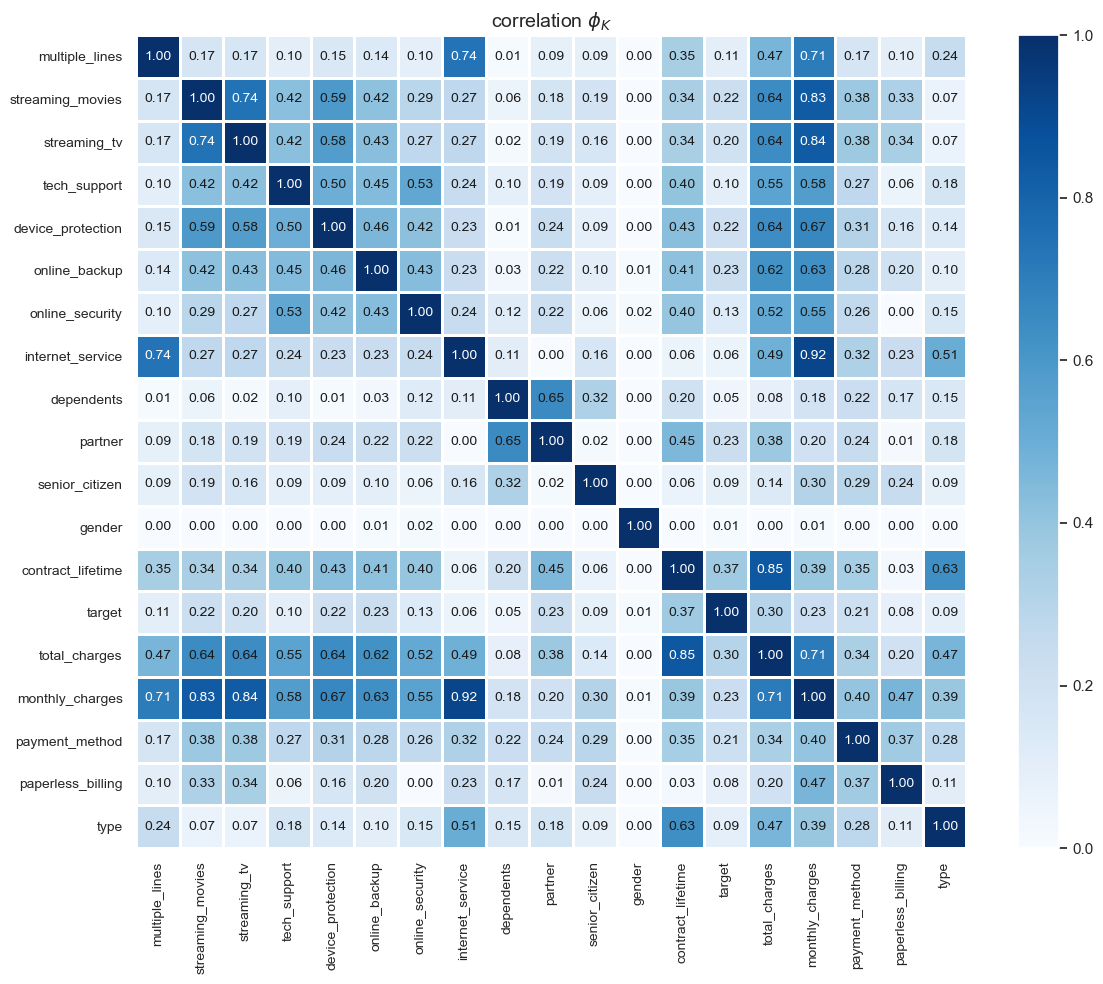

In [87]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(12,10))
plt.tight_layout()

В среднем сильнне всех коррелирует со многоми признаками **'monthly_charges'**. Необходимо выполнить исключение его из признаков.

In [88]:
df_for_corr = df_for_corr.drop(['monthly_charges'],axis=1)

In [89]:
phik_overview = df_for_corr.phik_matrix()
phik_overview

interval columns not set, guessing: ['paperless_billing', 'total_charges', 'target', 'contract_lifetime', 'senior_citizen', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']


,type,paperless_billing,payment_method,total_charges,target,contract_lifetime,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
type,1.000000,0.106860,0.277462,0.468471,0.094015,0.634155,0.000000,0.086231,0.179736,0.147680,0.505187,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.244410
paperless_billing,0.106860,1.000000,0.370495,0.203144,0.083398,0.026799,0.000000,0.242133,0.013218,0.172593,0.231438,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.099953
payment_method,0.277462,0.370495,1.000000,0.335175,0.214832,0.350964,0.000000,0.292725,0.243008,0.224903,0.323886,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.174849
total_charges,0.468471,0.203144,0.335175,1.000000,0.304287,0.847414,0.000000,0.137707,0.381042,0.082134,0.489674,0.521522,0.622643,0.641455,0.549866,0.642144,0.644671,0.467339
target,0.094015,0.083398,0.214832,0.304287,1.000000,0.374569,0.008581,0.086159,0.226688,0.046871,0.056621,0.132594,0.229482,0.218380,0.103652,0.200198,0.222232,0.105101
contract_lifetime,0.634155,0.026799,0.350964,0.847414,0.374569,1.000000,0.000000,0.063315,0.453688,0.198729,0.060845,0.395693,0.414982,0.426931,0.404795,0.339313,0.339313,0.347289
gender,0.000000,0.000000,0.000000,0.000000,0.008581,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.000000
senior_citizen,0.086231,0.242133,0.292725,0.137707,0.086159,0.063315,0.000000,1.000000,0.016992,0.324576,0.160702,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.087925
partner,0.179736,0.013218,0.243008,0.381042,0.226688,0.453688,0.000000,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.086249
dependents,0.147680,0.172593,0.224903,0.082134,0.046871,0.198729,0.000000,0.324576,0.652122,1.000000,0.108463,0.124945,0.031533,0.010416,0.096912,0.017331,0.058999,0.011198


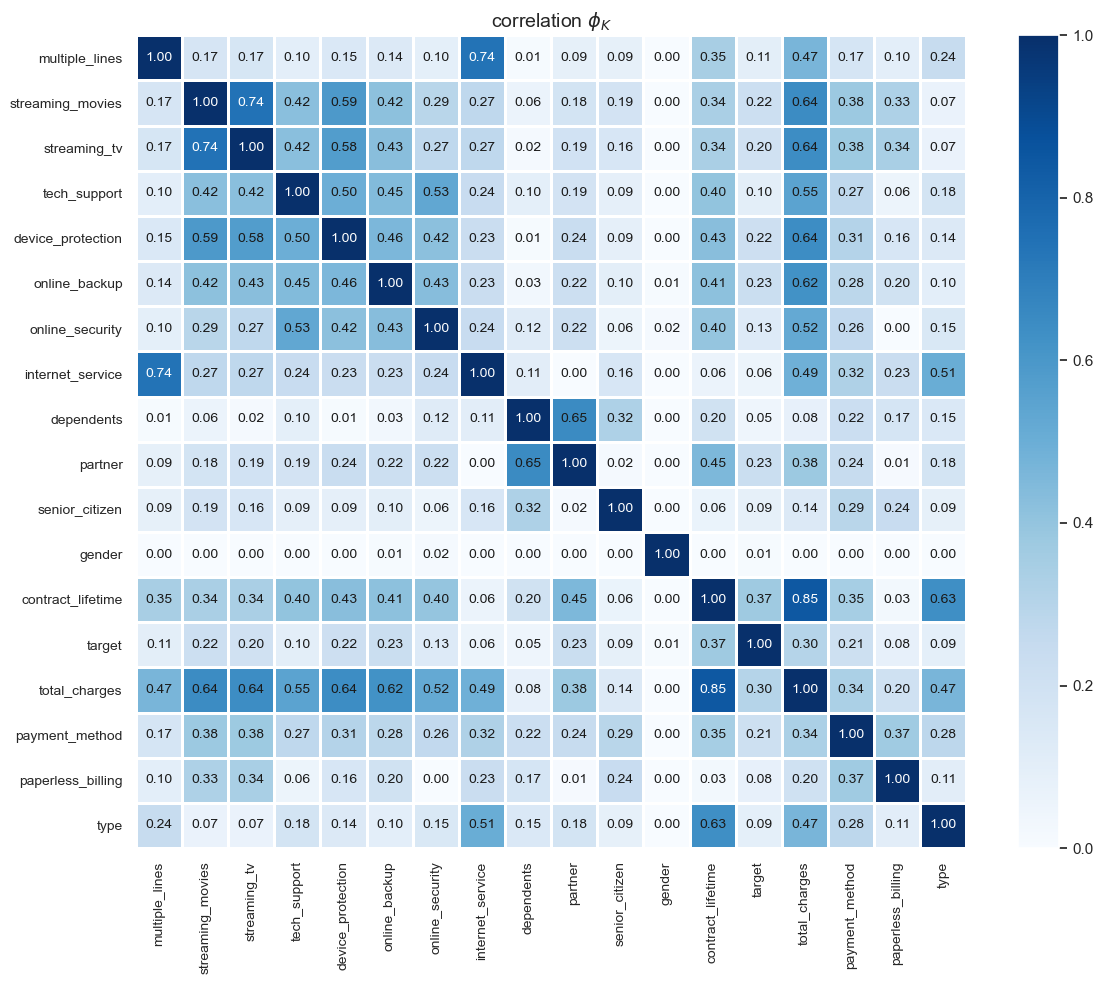

In [90]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(12,10))
plt.tight_layout()

Все признаки **очень слабо** коррелируют с целевым признаком

In [91]:
df_full = df_for_corr

### Вывод

Признаки 'customer_id','begin_date','end_date' исключены из дальней работы с моделями<br>
Была вывявлена корреляция признака **month_charges** со многими признаками, по этой причине он был удален из дальнейшего участия в работе.<br>
Умеренной или сильной корреляции с целевым признаком не выявлено ни у одного из признаков

## Разделение на выборки

### Кодирование

Для кодирования используется прямое кодирование get_dummies

In [92]:
df_ohe = pd.get_dummies(df_full, drop_first=True)

In [93]:
df_ohe

,paperless_billing,total_charges,target,contract_lifetime,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,internet_service_Fiber optic,internet_service_U,multiple_lines_1,multiple_lines_U
0,1,31.04,0,31,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,2071.84,0,1036,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,1,226.17,0,123,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,1960.60,0,1371,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,1,353.50,0,153,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2035.20,0,730,0,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,1,0
7039,1,7430.40,0,2191,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0
7040,1,325.60,0,337,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7041,1,520.80,0,215,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0


### Разбиение а выборки

Данные разбиваются в отношении 3:1

In [94]:
df_train, df_test = train_test_split(df_ohe, test_size=0.25, random_state=RANDOM)

In [95]:
X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
X_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

In [96]:
df_ohe = pd.get_dummies(df_full, drop_first=True)
df_ohe
df_train, df_test = train_test_split(df_ohe, test_size=0.25, random_state=RANDOM)
X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
X_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

### Масштабирование признаков

In [97]:
numeric_columns = ['total_charges', 'contract_lifetime']
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train[numeric_columns] = scaler.transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

### Отбор признаков

Для отбора признаков, используемых в дальнейшем для обучения моделей будет использоваться модель екурсивного исключения признаков (RFE)

In [98]:
n_feat = 5

In [99]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select = n_feat)
X_train = rfe.fit_transform(X_train, y_train)
print('\n\nОтбор методом случайных деревьев (Random Forest)\n', X_train)



Отбор методом случайных деревьев (Random Forest)
 [[ 1.78574711  1.76439515  1.          1.          1.        ]
 [ 2.34226859  1.49514854  0.          1.          0.        ]
 [-0.54078718  0.2015942   1.          1.          1.        ]
 ...
 [-0.69581969 -0.90758475  1.          0.          0.        ]
 [ 1.26771616  1.54051074  1.          1.          0.        ]
 [-0.72268362 -0.82271353  1.          0.          0.        ]]


In [100]:
X_test = rfe.transform(X_test)

In [101]:
X_train.shape

(5282, 5)

In [102]:
X_test.shape

(1761, 5)

**Названия отобранных признаков**

In [103]:
select_feature = rfe.get_feature_names_out()

In [104]:
select_feature

array(['total_charges', 'contract_lifetime', 'partner', 'type_Two year',
       'multiple_lines_1'], dtype=object)

Массивы для проверки моделей

In [105]:
X = np.concatenate((X_train , X_test))
y = np.concatenate((y_train , y_test))

## Обучение моделей

In [106]:
def model_learning(model, parameters):
    dir_params = model.get_params()
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=RANDOM)
    grid_model = GridSearchCV(model, parameters, scoring='roc_auc', cv=cv)
    grid_model.fit(X_train, y_train)
    print('Лучшая оценка на валидации: ', grid_model.best_score_)
    print('Лучшие гиперпараметры модели на валидации: ', grid_model.best_params_)
    print('Лучшая модель: ', grid_model.best_estimator_)
    
    return grid_model

Тестирование модели на тестовой выборке

In [108]:
def test_scoring(model):
    '''
    Тестирование модели на тестовой выборке
    '''
    
    pred_proba_test = model.predict_proba(X_test)[:, 1]
    pred_test = model.predict(X_test)
    print('Accuracy: ', round(model.score(X_test, y_test), 3))
    print('Presicion: ', round(precision_score(y_test, pred_test), 3))
    print('Recall: ', round(recall_score(y_test, pred_test), 3))
    print('AUC-ROC: ', round(roc_auc_score(y_test, pred_proba_test), 3))
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test)

    sns.set()
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()

Вывод графика распределения важности признаков

In [109]:
def feature_importance(importances):
    '''
    Вывод графика распределения важности признаков
    '''
    
    indices = np.argsort(importances)
    fig, ax = plt.subplots()
    ax.barh(range(len(importances)), importances[indices])
    ax.set_yticks(range(len(importances)))
    _ = ax.set_yticklabels(select_feature[indices])
    
    lf = []
    for i in indices[::-1][0:n_feat]:
        #print(np.array(X_train.columns)[i])
        #print(np.array(select_feature[i]))
        lf.append(select_feature[i])
    return lf

In [110]:
def app_data_model_param(df,list_param):
    df.loc[-1] = list_param
    df.index = df.index + 1
    df = df.sort_index()

Таблица для сбора данных полученных результатов

In [111]:
model_param = pd.DataFrame(columns=['model','roc_auc_train','pointer','cross_val_score', 'time','list_features'])

In [112]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features


### LogisticRegression

In [113]:
name_model = 'LogisticRegression'

In [114]:
model = LogisticRegression(random_state=RANDOM, n_jobs=-1)

In [115]:
param_grid = {'C' : np.linspace(0.001, 10, 20)}

In [116]:
%%time
start_time = datetime.now()
model = model_learning(model,param_grid)    
end_time=datetime.now()
wall_time = end_time - start_time

Лучшая оценка на валидации:  0.6796252950287207
Лучшие гиперпараметры модели на валидации:  {'C': 3.684842105263158}
Лучшая модель:  LogisticRegression(C=3.684842105263158, n_jobs=-1, random_state=190623)
CPU times: total: 453 ms
Wall time: 2.28 s


**Вычисление cross_val_score**

In [117]:
start_kfold = timer()
cross_score = cross_val_score(model.best_estimator_, X, y, cv=5,scoring='roc_auc').mean()
#cross_pred = cross_val_predict(model, X, y, cv=5)
#print(y_pred)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

**Определение важности признаков**

'LogisticRegression' object has no attribute 'feature_importances_'

In [118]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      cross_score,
                      wall_time.seconds,
                      select_feature
                     ]
                    )

In [119]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features
0,LogisticRegression,0.679625,"LogisticRegression(C=3.684842105263158, n_jobs...",0.684214,2,"[total_charges, contract_lifetime, partner, ty..."


### RandomForestClassifier

In [120]:
name_model = 'RandomForestClassifier'

In [121]:
model = RandomForestClassifier(random_state=RANDOM, n_jobs=-1)

In [122]:
param_grid = {'n_estimators': [300, 500, 1000],
            'max_depth': [1, 5, 9],
            'min_samples_leaf': np.arange(1, 6, 2),
            'min_samples_split': np.arange(2, 7, 2)
             }

In [123]:
%%time
start_time = datetime.now()
model = model_learning(model,param_grid)    
end_time=datetime.now()
wall_time = end_time - start_time

Лучшая оценка на валидации:  0.8207545151327656
Лучшие гиперпараметры модели на валидации:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
Лучшая модель:  RandomForestClassifier(max_depth=9, min_samples_split=4, n_estimators=1000,
                       n_jobs=-1, random_state=190623)
CPU times: total: 3min 33s
Wall time: 3min 45s


**Вычисление cross_val_score**

In [124]:
start_kfold = timer()
cross_score = cross_val_score(model.best_estimator_, X, y, cv=5,scoring='roc_auc').mean()
#cross_pred = cross_val_predict(model, X, y, cv=5)
#print(y_pred)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

**Определение важности признаков**

In [125]:
importances = model.best_estimator_.feature_importances_

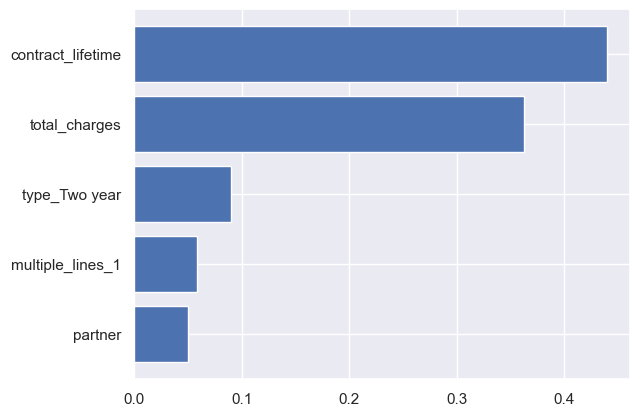

In [126]:
lf = feature_importance(importances)

In [127]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      cross_score,
                      wall_time.seconds,
                      lf
                     ]
                    )

In [128]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features
1,LogisticRegression,0.679625,"LogisticRegression(C=3.684842105263158, n_jobs...",0.684214,2,"[total_charges, contract_lifetime, partner, ty..."
0,RandomForestClassifier,0.820755,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827771,225,"[contract_lifetime, total_charges, type_Two ye..."


### LGBM

In [129]:
name_model = 'LGBMClassifier'

In [130]:
model = LGBMClassifier(random_state=RANDOM, min_child_samples = 10)

In [131]:
param_grid = {'n_estimators':  [250, 300,350],
                  'learning_rate': [0.01, 0.1, 0.5],
                  'max_depth': [1, 5, 9],
                  'class_weight':[None,'balanced']
             }

In [132]:
%%time
start_time = datetime.now()
model = model_learning(model,param_grid)    
end_time=datetime.now()
wall_time = end_time - start_time

Лучшая оценка на валидации:  0.8905644223537162
Лучшие гиперпараметры модели на валидации:  {'class_weight': None, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Лучшая модель:  LGBMClassifier(max_depth=5, min_child_samples=10, n_estimators=300,
               random_state=190623)
CPU times: total: 3min 41s
Wall time: 28.9 s


**Вычисление cross_val_score**

In [133]:
start_kfold = timer()
cross_score = cross_val_score(model.best_estimator_, X, y, cv=5,scoring='roc_auc').mean()
#cross_pred = cross_val_predict(model, X, y, cv=5)
#print(y_pred)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

In [134]:
kfold_time

1.0870754000000034

**Определение важности признаков**

In [135]:
importances = model.best_estimator_.feature_importances_

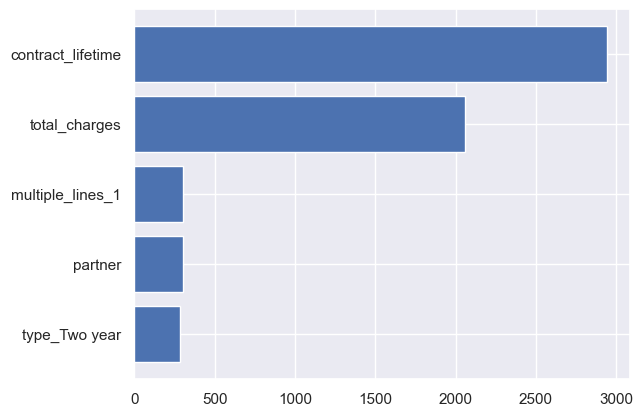

In [136]:
lf = feature_importance(importances)

In [137]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      cross_score,
                      wall_time.seconds,
                      lf
                     ]
                    )

In [138]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features
2,LogisticRegression,0.679625,"LogisticRegression(C=3.684842105263158, n_jobs...",0.684214,2,"[total_charges, contract_lifetime, partner, ty..."
1,RandomForestClassifier,0.820755,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827771,225,"[contract_lifetime, total_charges, type_Two ye..."
0,LGBMClassifier,0.890564,"LGBMClassifier(max_depth=5, min_child_samples=...",0.918395,28,"[contract_lifetime, total_charges, multiple_li..."


### XGBClassifier

In [139]:
name_model = 'XGBClassifier'

In [140]:
model = XGBClassifier(n_jobs=-1, verbosity=0, random_state=RANDOM)

In [141]:
param_grid = {'max_depth': [4, 6, 8, 9, 12],
              'learning_rate': [0.05, 0.1, 0.5, 1],
              'iterations': [50, 100]}

In [142]:
%%time
start_time = datetime.now()
model = model_learning(model,param_grid)    
end_time=datetime.now()
wall_time = end_time - start_time

Лучшая оценка на валидации:  0.9006421696108511
Лучшие гиперпараметры модели на валидации:  {'iterations': 50, 'learning_rate': 0.5, 'max_depth': 4}
Лучшая модель:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, iterations=50, learning_rate=0.5,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, ...)
CPU times: total: 5min 22s
Wall time: 42 s


**Вычисление cross_val_score**

In [143]:
start_kfold = timer()
cross_score = cross_val_score(model.best_estimator_, X, y, cv=5,scoring='roc_auc').mean()
#cross_pred = cross_val_predict(model, X, y, cv=5)
#print(y_pred)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

**Определение важности признаков**

In [144]:
importances = model.best_estimator_.feature_importances_

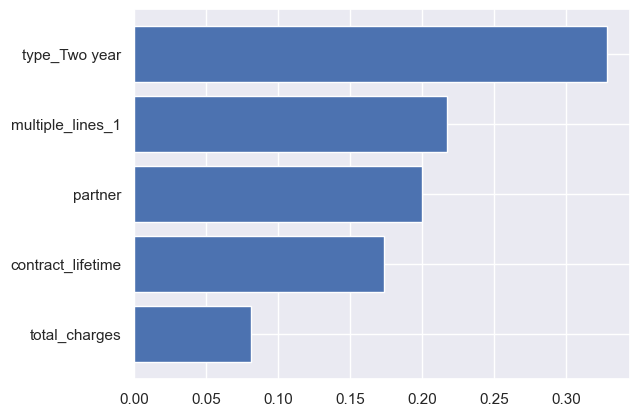

In [145]:
lf = feature_importance(importances)

In [146]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      cross_score,
                      wall_time.seconds,
                      lf
                     ]
                    )

In [147]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features
3,LogisticRegression,0.679625,"LogisticRegression(C=3.684842105263158, n_jobs...",0.684214,2,"[total_charges, contract_lifetime, partner, ty..."
2,RandomForestClassifier,0.820755,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827771,225,"[contract_lifetime, total_charges, type_Two ye..."
1,LGBMClassifier,0.890564,"LGBMClassifier(max_depth=5, min_child_samples=...",0.918395,28,"[contract_lifetime, total_charges, multiple_li..."
0,XGBClassifier,0.900642,"XGBClassifier(base_score=None, booster=None, c...",0.918466,42,"[type_Two year, multiple_lines_1, partner, con..."


### CatBoostRegressor

In [148]:
name_model = 'CatBoostClassifier'

In [149]:
model = CatBoostClassifier(random_state=RANDOM,verbose = False)

In [150]:
param_grid = {   'n_estimators': [300, 500, 1000],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [1, 5, 9],
                      'l2_leaf_reg': [1, 3]
             }

In [151]:
%%time
start_time = datetime.now()
model = model_learning(model,param_grid)    
end_time=datetime.now()
wall_time = end_time - start_time

Лучшая оценка на валидации:  0.9248012643334594
Лучшие гиперпараметры модели на валидации:  {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Лучшая модель:  <catboost.core.CatBoostClassifier object at 0x00000242C09EF370>
CPU times: total: 29min 25s
Wall time: 7min 5s


**Вычисление cross_val_score**

In [152]:
start_kfold = timer()
cross_score = cross_val_score(model.best_estimator_, X, y, cv=5,scoring='roc_auc').mean()
#cross_pred = cross_val_predict(model, X, y, cv=5)
#print(y_pred)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

In [153]:
importances = model.best_estimator_.feature_importances_

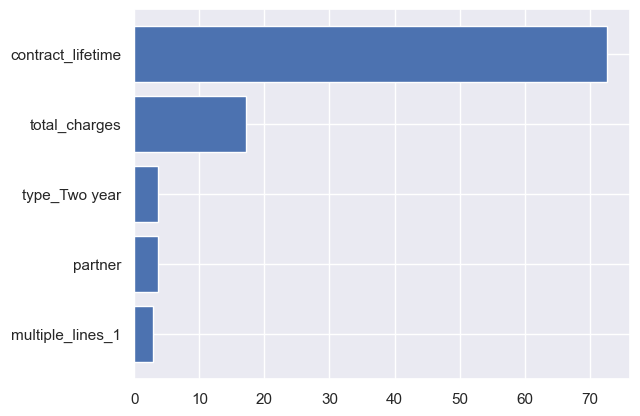

In [154]:
lf = feature_importance(importances)

In [155]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      cross_score,
                      wall_time.seconds,
                      lf
                     ]
                    )

In [156]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features
4,LogisticRegression,0.679625,"LogisticRegression(C=3.684842105263158, n_jobs...",0.684214,2,"[total_charges, contract_lifetime, partner, ty..."
3,RandomForestClassifier,0.820755,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827771,225,"[contract_lifetime, total_charges, type_Two ye..."
2,LGBMClassifier,0.890564,"LGBMClassifier(max_depth=5, min_child_samples=...",0.918395,28,"[contract_lifetime, total_charges, multiple_li..."
1,XGBClassifier,0.900642,"XGBClassifier(base_score=None, booster=None, c...",0.918466,42,"[type_Two year, multiple_lines_1, partner, con..."
0,CatBoostClassifier,0.924801,<catboost.core.CatBoostClassifier object at 0x...,0.931651,425,"[contract_lifetime, total_charges, type_Two ye..."


In [157]:
model_param = model_param.reset_index()

In [158]:
model_param = model_param.drop(['index'],axis=1)

### Итоговая таблица результатов моделирования

In [159]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features
0,LogisticRegression,0.679625,"LogisticRegression(C=3.684842105263158, n_jobs...",0.684214,2,"[total_charges, contract_lifetime, partner, ty..."
1,RandomForestClassifier,0.820755,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827771,225,"[contract_lifetime, total_charges, type_Two ye..."
2,LGBMClassifier,0.890564,"LGBMClassifier(max_depth=5, min_child_samples=...",0.918395,28,"[contract_lifetime, total_charges, multiple_li..."
3,XGBClassifier,0.900642,"XGBClassifier(base_score=None, booster=None, c...",0.918466,42,"[type_Two year, multiple_lines_1, partner, con..."
4,CatBoostClassifier,0.924801,<catboost.core.CatBoostClassifier object at 0x...,0.931651,425,"[contract_lifetime, total_charges, type_Two ye..."


### Вывод

Все модели, кроме LogisticRegression, показывают результат AUC_ROC выше 0,82 на тренировочной выборке. Самый высокий показатель по  roc_auc_train и cross_val_score имеет модель CatBoostClassifier.  Но у нее самое высокое время подбора параметров и обучения. ПРиемлемым вариантом может являться LGBMClassifier, имеющий почти самую высокую скорость и высокий показатель roc_auc_train<br>
Важными признаками являются: 
- contract_lifetime
- total_charges
- multiple_line_y
- type_Two year

## Тестирование модели

По результатам обучения и проверки моделей на кросс-валидационной метрике лучшей моделью стала:

In [160]:
model_param[model_param.roc_auc_train== model_param.roc_auc_train.max()].iloc[0,0]

'CatBoostClassifier'

In [161]:
best_model = model_param[model_param.roc_auc_train == model_param.roc_auc_train.max()].iloc[0,2]

In [162]:
best_model.get_params()

{'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'verbose': False,
 'max_depth': 5,
 'n_estimators': 500,
 'random_state': 190623}

Accuracy:  0.943
Presicion:  0.92
Recall:  0.684
AUC-ROC:  0.936


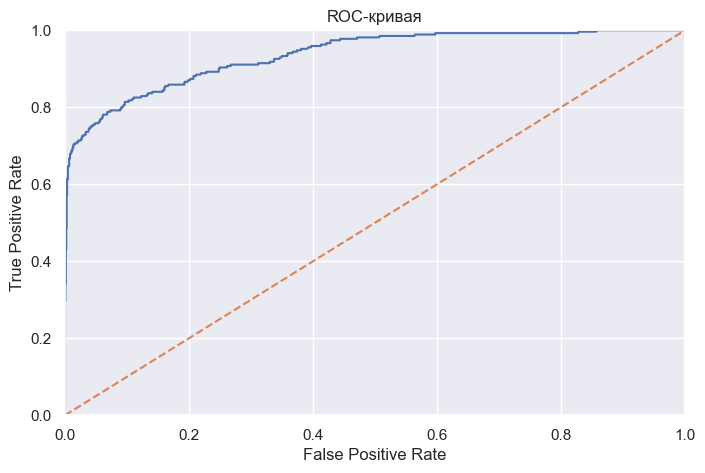

In [163]:
test_scoring(best_model)

### Вывод:

Лучшей моделью стала **CatBoostClassifier**<br>
Показатели:<br>
Accuracy:  0.943<br>
Presicion:  0.92<br>
Recall:  0.684<br>
AUC-ROC:  0.936<br>
Исходя из графика ROC-AUC можно сделать заключение, что наша модель является адекватной, так как линия графика гораздо выше диагонали<br>

Модель имеет высокий показатель Accuracy: 0.943, то есть количество правильных прогнозов порядка 94%

Очень точно классифицирует Positive значения среди всех. И обнаруживает почти 70% образцов класса 1, то есть тех, кто ушел

## Общий вывод

В ходе выполнения работы были загружены и изучены данные. Дубликатов и аномальных данных обнаружено не было. Данные были собраны в один датафрейм. Были созданы новые признаки target и contract_life, задействованные впоследствии в исследовательском анализе и при обучении моделей<br>

На этапе предобработки были удажены пропуски, появившиеся при объединении моделей, изменены названия столбцов в соответсвии с принятым стилем в программировании, изменены значения бинарных столбцов на 0 и 1, приведены в соответсвие типы данных.<br>
Исследовательский анализ данных позволил составить портрет уходящего абонента, который стоит рассмотреть в качестве отправной точки при принятии решений, направленных на предотвращение потери абонентов в компании провайдера. <br>

Исслдедование мультиколлинеарности данных не выявило серьезных зависимостей признаков друг от друга, за исключенией умеренной зависимости признака month_charges, который был исключен впоследствии из работы. С целевым признаком корреляции не выявлено.<br>

Данные были разделены только на тренировочную и тестовую выборки, по причине использования при обучении моделей GridSearchCV, используеющего кросс-валидацию. С помощью алгоритма RFE были отобраны 5 признаков для последующего обучения моделей.<br>
Были рассмотрены модели машинного обучения  **LogisticRegression, RandomForestClassifier, CatBoostClassifier, XGBClassifier, LGBMClassifier**.

Были показаны следующие результаты:

In [164]:
model_param

,model,roc_auc_train,pointer,cross_val_score,time,list_features
0,LogisticRegression,0.679625,"LogisticRegression(C=3.684842105263158, n_jobs...",0.684214,2,"[total_charges, contract_lifetime, partner, ty..."
1,RandomForestClassifier,0.820755,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827771,225,"[contract_lifetime, total_charges, type_Two ye..."
2,LGBMClassifier,0.890564,"LGBMClassifier(max_depth=5, min_child_samples=...",0.918395,28,"[contract_lifetime, total_charges, multiple_li..."
3,XGBClassifier,0.900642,"XGBClassifier(base_score=None, booster=None, c...",0.918466,42,"[type_Two year, multiple_lines_1, partner, con..."
4,CatBoostClassifier,0.924801,<catboost.core.CatBoostClassifier object at 0x...,0.931651,425,"[contract_lifetime, total_charges, type_Two ye..."


Модели градиентного бустинга показали результаты по метрике AUC_ROC > 0.85

Лучшей моделью стала **CatBoostClassifier**<br>
Показатели:<br>
**Accuracy: 0.943<br>**
Presicion: 0.92<br>
Recall: 0.684<br>
**AUC-ROC: 0.936<br>**

**Заказчику рекомендовано** использовать данную модель для идентификации потенциально нелояльных компании клиентов и использовать составленный портрет пользователя для принятися решений и предоставлении скидок и промокодов для абонентов. Так же необходимо предоставить больше данных, указанных в разделе **Вопросы к заказчику** для создания более точной модели.
    

**Время выполнения тетрадки**

In [165]:
end_note_time = timer()
full_note_time = (end_note_time - start_note_time)

In [171]:
print(f'Время выполнения тетрадки: {round(full_note_time/60)} минут')

Время выполнения тетрадки: 13 минут
